# 向量化对比for循环

In [ ]:
import math
import time
import numpy as np
import torch
from d2l import torch as d2l
n=10000
a=torch.ones(n)
b=torch.ones(n)
class Time:
    def __init__(self):
        self.times=[]
    def start(self):
        self.tik=time.time()
        return self.tik
    def end(self):
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    def avg(self):
        return sum(self.times)/len(self.times)
t=Time()
c=torch.zeros(n)
#for方法运行
t.start()
for i in range(n):
    c[i]=a[i]+b[i]
print(f"for循环遍历一次需要{t.end():.5f},平均时间为{t.avg():.5f}")
#向量+运行
t.start()
d = a + b
print(f'向量化时间{t.end():.5f} sec')

# 线性回归的实现

epoch 1, loss 6.4074621201
epoch 2, loss 1.3501116037
epoch 3, loss 0.2850940824
epoch 4, loss 0.0603562966
epoch 5, loss 0.0128647797
epoch 6, loss 0.0028036353
epoch 7, loss 0.0006698743
epoch 8, loss 0.0002167001


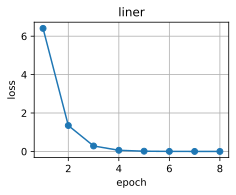

w的误差为tensor([ 0.0049, -0.0050])
tensor([0.0086])


In [513]:

import numpy as np
import torch
from torch.utils import data
from torch import nn
import matplotlib.pyplot as plt
# 生成数据集
def create_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
w_true=torch.tensor([2,-3.1])
b_true=4.2
f,labels=create_data(w_true, b_true, 2000)
#读取数据集
def load_array(data_array,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_array)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)# 把训练数据分成多个小组 ，此函数 每次抛出一组数据 
batch_size = 10
data_iter = load_array((f, labels), batch_size)
#定义模型
net=nn.Sequential(nn.Linear(2,1))
#初始化参数
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
#定义loss函数
loss=nn.MSELoss(reduction='mean')
#定义优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.002)#随机梯度下降,net.parameters()主要指w,b的参数
#训练
epochs = 8
a=[]
b=[]
for epoch in range(epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.mean().backward()
        trainer.step()
    with torch.no_grad():    
        l = loss(net(f), labels)
        a.append(l)
        b.append((epoch+1))
    print(f'epoch {epoch + 1}, loss {l:.10f}')
plt.plot(b,a,marker = 'o')
plt.grid()
plt.title("liner")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
w=net[0].weight.data
print(f"w的误差为{w_true-w.reshape(w_true.shape)}")
b=net[0].bias.data
print(f"{b_true-b}")

# soft回归

In [428]:
import torch
import torchvision#对计算机视觉实现的库
from torch.utils import data
from torchvision import transforms#对数据模型进行处理的库
from d2l import torch as d2l

d2l.use_svg_display()#使用svg格式展示图片

In [335]:
trans = transforms.ToTensor()#通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
mnist_train = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=trans, download=True)
len(mnist_train), len(mnist_test)

99.8%

100.6%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



119.3%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



(60000, 10000)

In [339]:
mnist_train[2][0].shape

torch.Size([1, 28, 28])

In [377]:
def get_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

AttributeError: 'tuple' object has no attribute 'flatten'

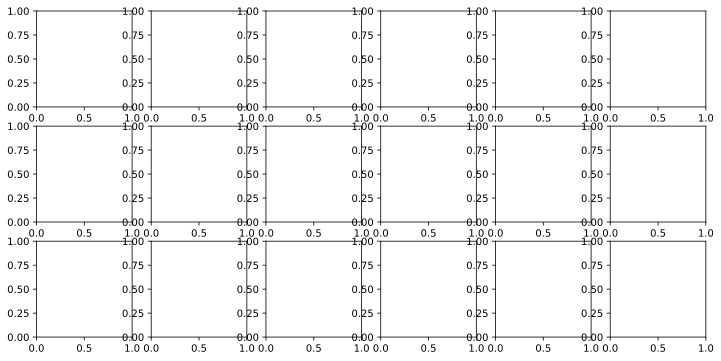

In [898]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=2):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 3, 6,titles=get_labels(y));
train_iter = data.DataLoader(mnist_train, 256, shuffle=True,num_workers=4)#4核进程
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

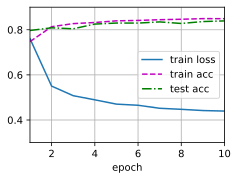

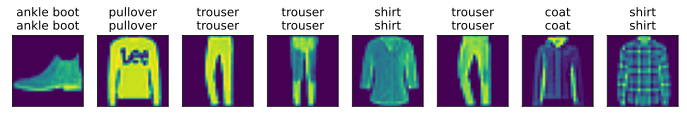

In [533]:
import torch
from torch import nn
from d2l import torch as d2l
def load_data_fashion_mnist(batch_size):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = transforms.ToTensor()#通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./datas", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./datas", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4))
batch_size = 256
train_iter, test_iter =load_data_fashion_mnist(batch_size)
#初始化参数，flatten用于调整输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
#初始化网络的各层
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.16)
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
def predict_ch3(net, test_iter, n=8):  #@save
    """预测标签"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])
predict_ch3(net, test_iter)
#d2l模块中的具体实现函数
#  #计算精度
# def accuracy(y_hat,y):
#     if len(y_hat.shape)>1 and y_hat.shape[1]>1:
#         y_hat=y_hat.argmax(axis=1)
#     cmp=y_hat.type(y.dtype)==y#返回0,1
#     return float(cmp.type(y.dtype).sum())
# accuracy(y_hat, y) / len(y)
# def evaluate_accuracy(net, data_iter):  #@save
# #     """计算在指定数据集上模型的精度"""
#     if isinstance(net, torch.nn.Module):
#         net.eval()  # 将模型设置为评估模式
#     metric =Accumulator(2)  # 正确预测数、预测总数
#     with torch.no_grad():
#         for X, y in data_iter:
#             metric.add(accuracy(net(X), y), y.numel())
#     return metric[0] / metric[1]
# 

In [486]:
#softmax
# num_inputs=784
# num_outputs=10

# w=torch.normal(0,0.01,size=(num_inputs,num_outputs), requires_grad=True)
# b=torch.zeros(num_outputs,requires_grad=True)
# def softmax(x):
#     x_new=torch.exp(x)
#     prop=x.sum(1,keepdim=True)
#     return x_new/prop
# def net(x):
#     return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)#定义一个softmax回归的模型
# #定义loss函数
# def cross_loss(y_hat,y):
#     return -torch.log(y_hat[range(len(y_hat)),y])#采用了Python的数组索引
# #测试
# y = torch.tensor([2, 2])
# y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
# a=cross_loss(y_hat,y)
# # y_hat=y_hat.argmax(axis=1)
# # cmp=y_hat.type(y.dtype)==y
# # print(cmp.type(y.dtype))

#

1.0

# 多层感知机

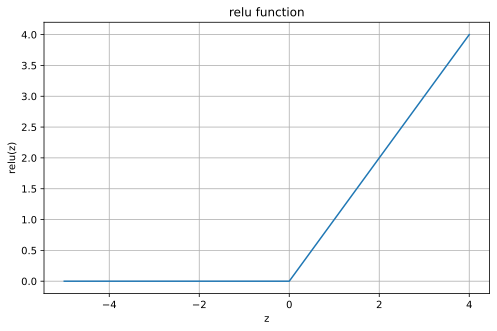

In [878]:
import torch 
import matplotlib.pyplot as plt
#Relu激活函数
z=torch.arange(-5.0,5.0,1.0,requires_grad=True)#写成浮点型
y=torch.relu(z)
plt.plot(z.detach(),y.detach())
plt.title("relu function")
plt.xlabel("z")
plt.ylabel("relu(z)")
plt.grid()
plt.show()

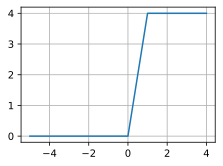

In [575]:
#对x的求导
y.backward(torch.ones_like(z),retain_graph=True)
z.grad
plt.plot(z.detach(),z.grad)
plt.grid()
plt.show()

#sigmiod函数

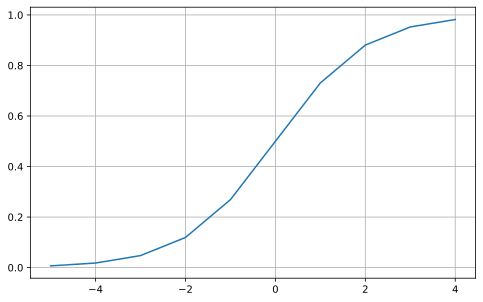

In [881]:
x=torch.arange(-5.0,5.0,1.0,requires_grad=True)
y=torch.sigmoid(x)
plt.plot(x.detach(),y.detach())
plt.grid()
plt.show()

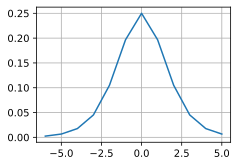

In [597]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)#一次反向传播后，各个节点的值会被清0，设为True则不会
plt.plot(x.detach(),x.grad)
plt.grid()
plt.show()

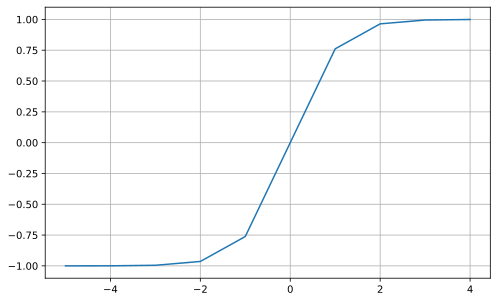

In [882]:
#tanh函数
y=torch.tanh(x)
plt.plot(x.detach(),y.detach())
plt.grid()
plt.show()

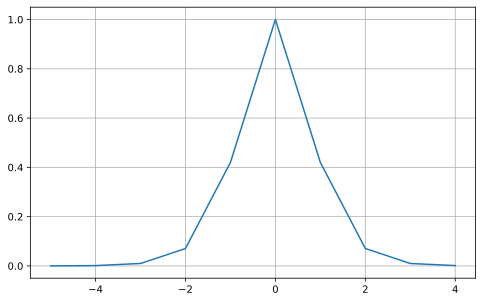

In [883]:
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(),x.grad)
plt.grid()
plt.show()


#多层感知机的实现

# 单隐藏层网络简洁实现

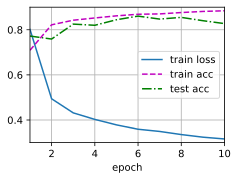

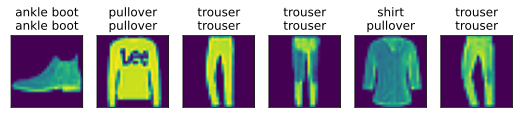

In [926]:
import torch
import torchvision#对计算机视觉实现的库
from torch import nn
from torch.utils import data
from torchvision import transforms#对数据模型进行处理的库
from d2l import torch as d2l
#获取数据集
def load_data_fashion_mnist(batch_size):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = transforms.ToTensor()#通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./datas", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./datas", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4))
#定义一个网络模型
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10))#nn.flatten()表示将任意维度转化为向量*batch的张量
#初始化各层的权重值
def init_weights(w):
    if type(w)==nn.Linear:
        nn.init.normal_(w.weight,std=0.01)
net.apply(init_weights)
batch_size, lr, num_epochs = 256, 0.3, 10
train_iter, test_iter =load_data_fashion_mnist(batch_size)
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
d2l.predict_ch3(net,test_iter)
# def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
#     """训练模型"""
#     animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
#                         legend=['train loss', 'train acc', 'test acc'])
#     for epoch in range(num_epochs):
#         train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
#         test_acc = evaluate_accuracy(net, test_iter)
#         animator.add(epoch + 1, train_metrics + (test_acc,))
#     train_loss, train_acc = train_metrics
#     assert train_loss < 0.5, train_loss
#     assert train_acc <= 1 and train_acc > 0.7, train_acc
#     assert test_acc <= 1 and test_acc > 0.7, test_acc
# def train_epoch_ch3(net, train_iter, loss, updater):  #@save
#     """训练模型一个迭代周期"""
#     # 将模型设置为训练模式
#     if isinstance(net, torch.nn.Module):
#         net.train()
#     # 训练损失总和、训练准确度总和、样本数
#     metric = Accumulator(3)
#     for X, y in train_iter:
#         # 计算梯度并更新参数
#         y_hat = net(X)
#         l = loss(y_hat, y)
#         if isinstance(updater, torch.optim.Optimizer):
#             # 使用PyTorch内置的优化器和损失函数
#             updater.zero_grad()
#             l.mean().backward()
#             updater.step()
#         else:
#             # 使用定制的优化器和损失函数
#             l.sum().backward()
#             updater(X.shape[0])
#         metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
#     # 返回训练损失和训练精度
#     return metric[0] / metric[2], metric[1] / metric[2]


# 卷积网络的简单实现（leNet-5架构）

In [727]:
import torch
from torch import nn
from d2l import torch as d2l

#图像卷积运算
def conv2d(x,k):
    r,c=k.shape
    y=torch.zeros(x.shape[0]-r+1,x.shape[1]-c+1)
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i,j]=(x[i:i+r,j:j+c]*k).sum()
    return y
x = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
v = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
conv2d(x,v)
#定义卷积层
class Conv2D(nn.Module):
    def __init__(self,f_size):
        super.__init()
        self.weight=nn.Parameter(torch.randn(f_size))
        self.bias=nn.Parameter(torch.zeros(0))
    def forward(self,x):
        return conv2d(x,self.weight)+self.bias
y=conv2d(x,v)


epoch: 2, loss :17995844.000
epoch: 4, loss :325882421968896.000
epoch: 6, loss :5901326674622041554944.000
epoch: 8, loss :106865699018463347335214661632.000
epoch: 10, loss :1935205389056891801631403899864743936.000


In [866]:
import torch
from torch import nn
from d2l import torch as d2l
#定义卷积层
class Conv2D(nn.Module):
    def __init__(self,f_size):
        super.__init()
        self.weight=nn.Parameter(torch.randn(f_size))
        self.bias=nn.Parameter(torch.zeros(0))
    def forward(self,x):
        return conv2d(x,self.weight)+self.bias
#图像卷积运算
def conv2d(x,k):
    r,c=k.shape
    y=torch.zeros(x.shape[0]-r+1,x.shape[1]-c+1)
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i,j]=(x[i:i+r,j:j+c]*k).sum()
    return y
#学习核函数
a=torch.ones(4,4)
b=torch.tensor([[1,1],[0,0]])
c=conv2d(a,b)
b
con2d=nn.Conv2d(1,1,kernel_size=(2,2),bias=False)#定义卷积层
a=a.reshape(1,4,4)
c=c.reshape(1,3,3)
lr=0.01
epochs=10
for epoch in range(epochs):
    c_hat=con2d(a)
    l=0.5*(c_hat-c)**2
    con2d.zero_grad()
    l.sum().backward()
    con2d.weight.data[:]-=lr * con2d.weight.grad
    print(f"epoch:{epoch+1},loss:{l.sum():.4f}")
con2d.weight.data.reshape(2,2)

epoch:1,loss:12.6028
epoch:2,loss:5.1621
epoch:3,loss:2.1144
epoch:4,loss:0.8661
epoch:5,loss:0.3547
epoch:6,loss:0.1453
epoch:7,loss:0.0595
epoch:8,loss:0.0244
epoch:9,loss:0.0100
epoch:10,loss:0.0041


tensor([[0.6351, 0.3379],
        [0.1696, 0.8381]])